In [1019]:
!pip install tensorflow

In [1020]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [1021]:
data = tf.keras.datasets.fashion_mnist.load_data()

In [1022]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [1023]:
(x_train, y_train), (x_test, y_test) = data

In [1024]:
print(y_train, len(y_train), set(y_train))

TypeError: 'dict' object is not callable

In [ ]:
from tensorflow.keras import utils

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/Users/satakehiroto/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7805 - loss: 0.6280
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8624 - loss: 0.3838
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8771 - loss: 0.3383
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8840 - loss: 0.3186
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8897 - loss: 0.2978


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8744 - loss: 0.3473


[0.34980231523513794, 0.8752999901771545]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
!pip install Pillow


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image  # これでPillowをインポートします

# 画像を読み込み、28x28ピクセルにリサイズ、グレースケールに変換
img = load_img("/Users/satakehiroto/unknown_sneaker.png", target_size=(28, 28), color_mode='grayscale')

# 画像を表示
img.show()


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array


In [ ]:
array = img_to_array(img)
array

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [ ]:
array.shape

(28, 28, 1)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
import numpy as np
array = array.reshape((1, 28, 28))
array.shape

(1, 28, 28)

In [ ]:
array = array / 255

In [ ]:
model.predict(array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[5.0658919e-08, 4.2847539e-08, 5.4940648e-09, 1.9745265e-08,
        6.8607832e-08, 2.9166564e-04, 3.3181831e-08, 9.9963248e-01,
        3.7965183e-05, 3.7653106e-05]], dtype=float32)

In [ ]:
from tensorflow.keras import utils

In [ ]:
utils.set_random_seed(0)

In [ ]:
import tensorflow as tf
data = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_train, y_train), (x_test, y_test) = data

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
import numpy as np
print(np.amin(x_train), np.amax(x_train))
print(np.amin(y_train), np.amax(y_train))
print(np.amin(x_test), np.amax(x_test))
print(np.amin(y_test), np.amax(y_test))

0 255
0 9
0 255
0 9


In [ ]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [ ]:
np.set_printoptions(linewidth=300)
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

Matplotlib is building the font cache; this may take a moment.


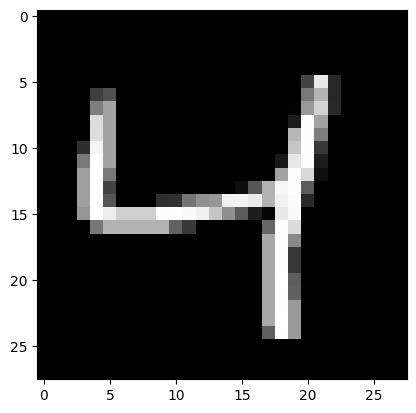

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2], cmap='gray')

In [ ]:
y_train[2]

4

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
np.set_printoptions(linewidth=300)
x_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        

In [ ]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [ ]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential() #クラスを作成しインスタンス化

In [ ]:
model.add(Flatten(input_shape=(28, 28)))#sequential関数をmodelに代入している。

/Users/satakehiroto/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(Dense(32, activation='relu'))

In [ ]:
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8264 - loss: 0.6226 - val_accuracy: 0.9427 - val_loss: 0.2028
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.2349 - val_accuracy: 0.9560 - val_loss: 0.1531
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9468 - loss: 0.1801 - val_accuracy: 0.9615 - val_loss: 0.1328
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.1481 - val_accuracy: 0.9643 - val_loss: 0.1234
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9622 - loss: 0.1270 - val_accuracy: 0.9657 - val_loss: 0.1176
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9668 - loss: 0.1119 - val_accuracy: 0.9668 - val_loss: 0.1145
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9705 - loss: 0.1002 - val_accuracy: 0.9668 - val_loss: 0.1124
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9735 - loss: 0.0904 - 

In [ ]:
history.history

{'accuracy': [0.8931296467781067,
  0.9383333325386047,
  0.9517777562141418,
  0.9595741033554077,
  0.9654629826545715,
  0.9695370197296143,
  0.9727592468261719,
  0.9754629731178284,
  0.9775000214576721,
  0.9789629578590393],
 'loss': [0.3825646936893463,
  0.21185046434402466,
  0.1655951291322708,
  0.1373969167470932,
  0.11850050091743469,
  0.10464821755886078,
  0.09352996945381165,
  0.08454541862010956,
  0.07718060910701752,
  0.07073607295751572],
 'val_accuracy': [0.9426666498184204,
  0.9559999704360962,
  0.9614999890327454,
  0.9643333554267883,
  0.965666651725769,
  0.9668333530426025,
  0.9668333530426025,
  0.9670000076293945,
  0.9681666493415833,
  0.9696666598320007],
 'val_loss': [0.20284098386764526,
  0.15308815240859985,
  0.1328446865081787,
  0.1233646348118782,
  0.11756180971860886,
  0.11445239931344986,
  0.1124172955751419,
  0.11183996498584747,
  0.11183662712574005,
  0.11216175556182861]}

NameError: name 'DataFrame' is not defined

In [ ]:
!pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd

df = pd.DataFrame(history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.893130,0.382565,0.942667,0.202841
1,0.938333,0.211850,0.956000,0.153088
2,0.951778,0.165595,0.961500,0.132845
3,0.959574,0.137397,0.964333,0.123365
4,0.965463,0.118501,0.965667,0.117562
5,0.969537,0.104648,0.966833,0.114452
6,0.972759,0.093530,0.966833,0.112417
7,0.975463,0.084545,0.967000,0.111840
8,0.977500,0.077181,0.968167,0.111837
9,0.978963,0.070736,0.969667,0.112162


<Axes: >

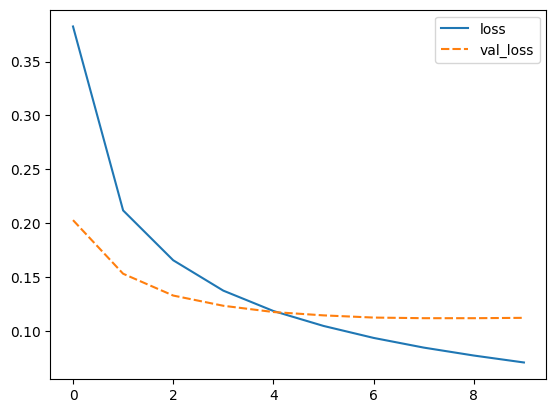

In [ ]:
import seaborn as sns
sns.lineplot(data=df[['loss','val_loss']])

<Axes: >

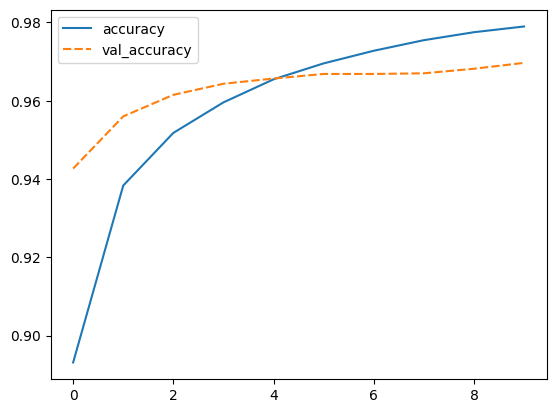

In [ ]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [ ]:
utils.set_random_seed(0)

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=7,
    validation_split=0.1)

/Users/satakehiroto/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.6226 - val_accuracy: 0.9427 - val_loss: 0.2028
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.2349 - val_accuracy: 0.9560 - val_loss: 0.1531
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9468 - loss: 0.1801 - val_accuracy: 0.9615 - val_loss: 0.1328
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9554 - loss: 0.1481 - val_accuracy: 0.9643 - val_loss: 0.1234
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9622 - loss: 0.1270 - val_accuracy: 0.9657 - val_loss: 0.1176
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9668 - loss: 0.1119 - val_accuracy: 0.9668 - val_loss: 0.1145
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9705 - loss: 0.1002 - val_accuracy: 0.9668 - val_loss: 0.1124


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9543 - loss: 0.1411


[0.1230895146727562, 0.9620000123977661]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
unknown_img = load_img("/Users/satakehiroto/unknown_mnist.png", target_size=(28, 28), color_mode = 'grayscale')
unknown_img



In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
unknown_array = img_to_array(unknown_img)
unknown_array

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [ ]:
unknown_array.shape

(28, 28, 1)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
unknown_array = unknown_array.reshape((1, 28, 28))
unknown_array.shape

(1, 28, 28)

In [ ]:
unknown_array = unknown_array / 255

In [ ]:
result = model.predict(unknown_array)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


array([[1.8071616e-05, 1.2964429e-02, 4.5930203e-02, 9.3112642e-01, 9.6735799e-05, 7.8028085e-04, 2.2797599e-06, 6.8278692e-04, 8.3140181e-03, 8.4899439e-05]], dtype=float32)

<Axes: >

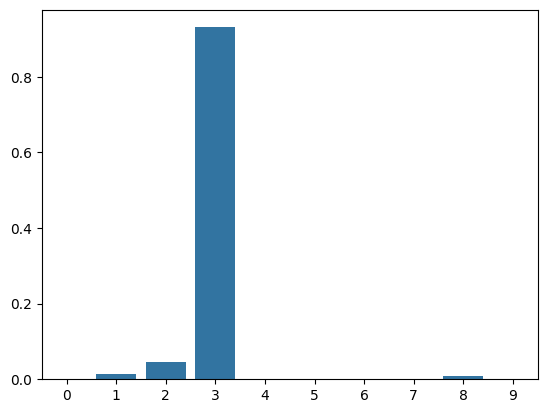

In [ ]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9], y=result[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Flatten(input_shape=(28,28)))

/Users/satakehiroto/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.add(Dense(32,activation="relu"))

In [ ]:
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train,
    batch_size=32,
    epochs=10,
    validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8272 - loss: 0.6048 - val_accuracy: 0.9472 - val_loss: 0.1862
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9342 - loss: 0.2253 - val_accuracy: 0.9575 - val_loss: 0.1468
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9481 - loss: 0.1766 - val_accuracy: 0.9603 - val_loss: 0.1301
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9565 - loss: 0.1472 - val_accuracy: 0.9632 - val_loss: 0.1222
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9614 - loss: 0.1263 - val_accuracy: 0.9647 - val_loss: 0.1163
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9674 - loss: 0.1109 - val_accuracy: 0.9673 - val_loss: 0.1118
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9706 - loss: 0.0988 - val_accuracy: 0.9673 - val_loss: 0.1104
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0892 - 

In [ ]:
history.history

{'accuracy': [0.8959444165229797,
  0.9403518438339233,
  0.9526296257972717,
  0.9602592587471008,
  0.9651296138763428,
  0.9695925712585449,
  0.9726851582527161,
  0.9754074215888977,
  0.9780370593070984,
  0.9796481728553772],
 'loss': [0.37073057889938354,
  0.2054578959941864,
  0.16373640298843384,
  0.1377168893814087,
  0.11906825751066208,
  0.10510718822479248,
  0.0940144956111908,
  0.08499451726675034,
  0.07784400880336761,
  0.0717729702591896],
 'val_accuracy': [0.9471666812896729,
  0.9574999809265137,
  0.9603333473205566,
  0.9631666541099548,
  0.9646666646003723,
  0.9673333168029785,
  0.9673333168029785,
  0.9683333039283752,
  0.9681666493415833,
  0.968666672706604],
 'val_loss': [0.18622815608978271,
  0.14675959944725037,
  0.13009776175022125,
  0.12222477048635483,
  0.11629965156316757,
  0.11182498931884766,
  0.11039555072784424,
  0.10914736241102219,
  0.10837139189243317,
  0.10965932905673981]}

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df

,accuracy,loss,val_accuracy,val_loss
0,0.895944,0.370731,0.947167,0.186228
1,0.940352,0.205458,0.957500,0.146760
2,0.952630,0.163736,0.960333,0.130098
3,0.960259,0.137717,0.963167,0.122225
4,0.965130,0.119068,0.964667,0.116300
5,0.969593,0.105107,0.967333,0.111825
6,0.972685,0.094014,0.967333,0.110396
7,0.975407,0.084995,0.968333,0.109147
8,0.978037,0.077844,0.968167,0.108371
9,0.979648,0.071773,0.968667,0.109659


<Axes: >

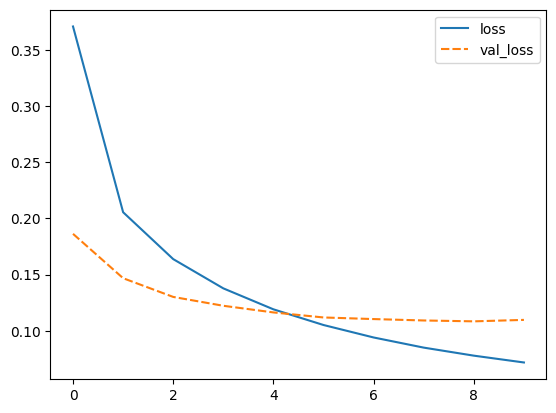

In [ ]:
import seaborn as sns
sns.lineplot(data=df[["loss","val_loss"]])

<Axes: >

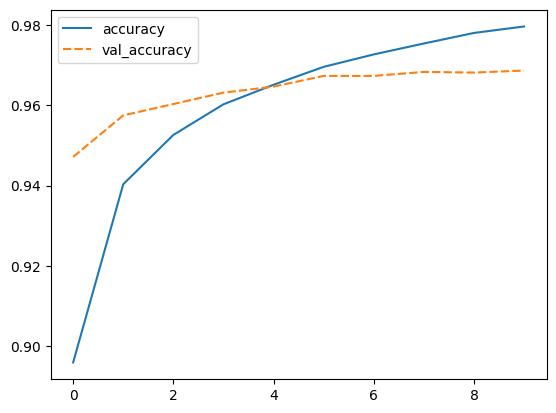

In [ ]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [ ]:
utils.set_random_seed(0)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs=6,
                    validation_split=0.1)

/Users/satakehiroto/.pyenv/versions/3.12.6/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8264 - loss: 0.6226 - val_accuracy: 0.9427 - val_loss: 0.2028
Epoch 2/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9309 - loss: 0.2349 - val_accuracy: 0.9560 - val_loss: 0.1531
Epoch 3/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9468 - loss: 0.1801 - val_accuracy: 0.9615 - val_loss: 0.1328
Epoch 4/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.1481 - val_accuracy: 0.9643 - val_loss: 0.1234
Epoch 5/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9622 - loss: 0.1270 - val_accuracy: 0.9657 - val_loss: 0.1176
Epoch 6/6
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9668 - loss: 0.1119 - val_accuracy: 0.9668 - val_loss: 0.1145


<Axes: >

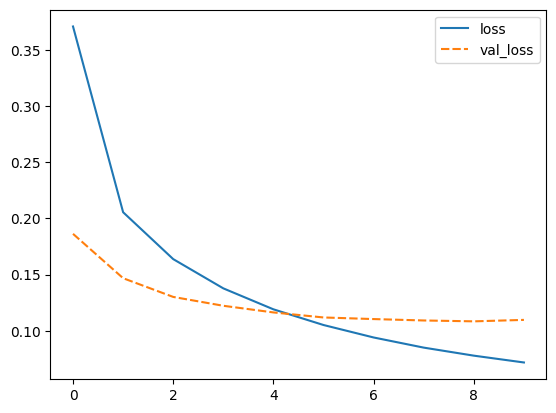

In [ ]:
sns.lineplot(data=df[["loss","val_loss"]])

<Axes: >

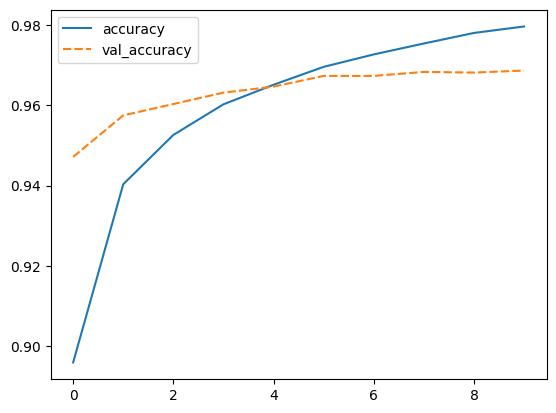

In [ ]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [ ]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9530 - loss: 0.1443


[0.12658379971981049, 0.9607999920845032]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

unknown_img = load_img("/Users/satakehiroto/unknown_mnist.png", target_size=(28, 28), color_mode = 'grayscale')
unknown_img


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
unknown_array = img_to_array(unknown_img)
unknown_array

array([[[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
    

In [ ]:
unknown_array.shape

(28, 28, 1)

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
unknown_array = unknown_array.reshape(1,28,28)
unknown_array.shape

(1, 28, 28)

In [ ]:
unknown_array = unknown_array / 255

In [ ]:
result = model.predict(unknown_array)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[3.5240620e-05, 1.3163053e-02, 5.0722182e-02, 9.2193395e-01, 1.3675797e-04, 1.2018868e-03, 3.5936894e-06, 8.3324424e-04, 1.1836477e-02, 1.3352158e-04]], dtype=float32)

<Axes: >

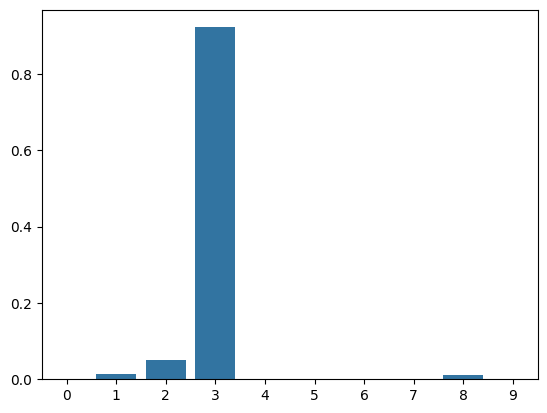

In [ ]:
sns.barplot(x=[0,1,2,3,4,5,6,7,8,9],y=result[0])

In [ ]:
mylist=[1,2,3,4,5,6]
print("[加算代入]") # 加算代入

#a = 6 #for文の外で定義する。

for i in mylist:
    a = 6 #for文の外で定義する。
    a += i
   
    print(f"{i}回目は,{a}です。")

[加算代入]
1回目は,7です。
2回目は,8です。
3回目は,9です。
4回目は,10です。
5回目は,11です。
6回目は,12です。


In [ ]:
mylist=[1,2,3,4,5,6]
print("[加算代入]") # 加算代入

#a = 6 #for文の外で定義する。


for i in mylist:
    a = 6 #for文の外で定義する。
    a -= i
       print(f"{i}回目は,{a}です。")

[加算代入]
1回目は,5です。
2回目は,4です。
3回目は,3です。
4回目は,2です。
5回目は,1です。
6回目は,0です。


In [ ]:
import random

#mylist=[1,2,3,4,5,6]


#a = 6 #for文の外で定義する。


for t in mylist:
    t = random.randint(0,5)
    #a = 10 #for文の外で定義する。
    #a += i

    if 3<t:
        print(f"{i}に足した数字は,{t}です。")
    else:
        print(f"条件に満たしていないです。")

6に足した数字は,4です。
条件に満たしていないです。
条件に満たしていないです。
6に足した数字は,4です。
条件に満たしていないです。
6に足した数字は,5です。


In [ ]:
#1から１０までの数字をランダムで作成します。
#10回サイコロを振り6以上だと”通過”と表示し、６以下だと”NG”と表示するようにする。

import random

for i in range(10):
    Answer = random.randint(0,10)

    if 6<Answer:
        print(f"{i}回目は{Answer}なのでokです。")
    else:
        print(f"NG")



0回目は7なのでokです。
NG
2回目は7なのでokです。
NG
NG
NG
NG
NG
NG
NG


In [ ]:
import random

# Productクラス
class Product:
    def __init__(self, name, price, stock, category=""):
        self.name = name  # 商品名（映画名）
        self.price = price  # 価格
        self.stock = stock  # 在庫数
        self.category = category  # カテゴリ（デフォルトで空文字列）

    # 在庫数を更新する関数
    def update_stock(self, sold):
        if sold <= self.stock:  # 売れた数が在庫数を超えない場合
            self.stock -= sold  # 在庫数を更新
        else:
            print(f"{self.name}の在庫が足りません。")  # 在庫不足のメッセージ

# ４つの映画のリスト（タイトル、値段、在庫数、カテゴリ）
products = [
    Product("ターミネーター", 1500, 100, "映画"),
    Product("パイレーツ", 1200, 80, "映画"),
    Product("ブレイキングバッド", 1000, 120, "テレビ"),
    Product("マトリックス", 1800, 50, "映画")
]

# 売上金額が一番高かった商品を更新する為の変数
top_product_name = ""  # 一番売れた商品の名前を代入する為の変数。
top_sales = 0  # 一番売れた商品の金額を代入するための変数。

# 各商品について売れた数をランダムに生成し、売上金額を計算
for product in products:
    sold = random.randint(0, product.stock)  # 売れた数（在庫数からランダムに生成）
    total_sales = product.price * sold  # 売上金額 = 価格 × 売れた数

    # 売上が最大の時に更新
    if total_sales > top_sales:
        top_sales = total_sales
        top_product_name = product.name

    # update_stockを使って在庫を更新
    product.update_stock(sold)  # 売れた数を引数として渡す

# 結果を表示
print(f"一番売上が高かったのは「{top_product_name}」で、{top_sales}円でした。")

# 各商品の最終的な在庫数を表示
for product in products:
    print(f"{product.name}の最終在庫数: {product.stock}")


一番売上が高かったのは「ターミネーター」で、90000円でした。
ターミネーターの最終在庫数: 40
パイレーツの最終在庫数: 43
ブレイキングバッドの最終在庫数: 83
マトリックスの最終在庫数: 15


In [ ]:
import random

class Product:
    def __init__(self,movie,price,category,stock):
        self.movie = movie
        self.price = price
        self.category = category
        self.stock = stock
    
    def update_stock(self,number_of_sold):
        if number_of_sold <= self.stock:
            self.stock -= number_of_sold
    #オブジェクトの生成
movies=[
    Product("パイレーツオブカリビアン",100,"",50),
    Product("忍たま乱太郎",500,"",80),
    Product("ホームアローン",250,"",50),
    Product("ハリーポッター",300,"",80)
]

#その日の一番売上が高かった商品名
top_product_name = ""
top_product_price = 0
#その日の売上が一番高かった値段

#日々値段は変動しないが、在庫は日々変動するため、在庫にランダム関数をかける。
for i in movies:
    number_of_sold = random.randint(0,i.stock)
    total_sales_for_a_day = i.price * number_of_sold
   #print({ number_of_sold},{ total_sales_for_a_day})
#売り上げが最大の時に更新する
    if total_sales_for_a_day > top_product_price:
        top_product_price = total_sales_for_a_day
        top_product_name = i.movie

    i.update_stock(number_of_sold)
#更新された"update_stock"を表示させる。



print(f"一番売上高が高かったのは{top_product_name}で、{top_product_price}円でした。\n")

for i in movies:
    print(f"現在の{i.movie}の在庫数は{i.stock}です。")

一番売上高が高かったのはハリーポッターで、18900円でした。

現在のパイレーツオブカリビアンの在庫数は9です。
現在の忍たま乱太郎の在庫数は60です。
現在のホームアローンの在庫数は8です。
現在のハリーポッターの在庫数は17です。


In [ ]:
user_names=[1,2,3,4,5,6]

user_names.append(7)

print(user_names)

user_names[1]="八助"

for i in user_names:
    a = random.randint(0,10)
    print(a)

[1, 2, 3, 4, 5, 6, 7]
2
7
3
8
5
2
6


In [ ]:
import random

user_names = [1, 2, 3, 4, 5, 6]
user_names.append(7)

print(user_names)

user_names[1] = "八助"

for i in range(len(user_names)):
    a = random.randint(0, 10)
    print(f"{user_names[i]}のランダムな数字: {a}")


[1, 2, 3, 4, 5, 6, 7]
1のランダムな数字: 5
八助のランダムな数字: 4
3のランダムな数字: 7
4のランダムな数字: 6
5のランダムな数字: 0
6のランダムな数字: 4
7のランダムな数字: 8


In [ ]:
stationary_price = {"鉛筆":100,"ボールペン":20,"シャープペンシル":22}

print(stationary_price["ボールペン"])

20


In [ ]:
array = ["月曜日は晴れです","火曜日は雨です","水曜日は晴れです。"]


print(array[2])

set={"佐竹":"0135",
    "矢野":"0092",
    "澤部":"5656"}

print(set["矢野"])

水曜日は晴れです。
0092


In [ ]:
num = 19

if 10 < num:
    print("変数numは10より大きいです。")


if num < 20:
    print("変数numは20より小さいです。")

変数numは10より大きいです。
変数numは20より小さいです。


In [ ]:
print(40+18)

print(45 > 30)

58
True


In [ ]:
import random

num = random.randint(0,4)

print(num)
if num == 4:
    print("大当たりです。")

4
大当たりです。


In [ ]:
import random

num = random.randint(0,4)

if num == 4:
    print("大当たりです")

else:
    print("ハズレです")

ハズレです


In [ ]:
import random

num = random.randint(0,4)

print(num)
if num == 4:
    print("大当たりです")

elif num == 3:
    print("あたりです。")

else:
    print("ハズレです")

3
あたりです。


In [ ]:
import random

num = random.randint(10,100)

print(num)

if 10 < num < 30:
    print("変数numは１０より大きく、３０より小さいです。")

28
変数numは１０より大きく、３０より小さいです。


In [ ]:
import random

num = random.randint(10,20)


if num == 10 nor um ==30

変数numは１０または３０です。


In [ ]:

var = 5

if var % 3 == 0 and var % 5== 0:
    print("Fizz Buzz")

elif var % 3 == 0:
    print("FIZZ")

elif var % 5 ==0 :
    print("BUZZ")

else:
    print("ちゃうで")

BUZZ


In [ ]:


var = 5


if var % 3 ==0 :
    print("FIZZ")

elif var % 5 == 0:
    print("BUZZ")

elif var % 3 == 0 and var % 5== 0:
    print("Fizz Buzz")

else:
    print("var")

BUZZ


In [ ]:
for i in range(1, 101):
    if i % 15 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz")
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


In [ ]:
import random

num = random.randint(0,4)

while num != 0:
    num = random.randint(0,4)
    print(num)

    #最初に０が出たら終了、０以外であれば次に０が出るまで０〜４まで回し続ける。

1
2
1
2
2
2
2
4
3
1
3
4
1
0


In [ ]:
#ランダムな整数を利用するため、記述が必要です。
import random

# 変数numに0~4までのランダムな整数を代入する
num = random.randint(0, 4)

# 変数numの最初の値を出力する（確認用）
print(f"最初の値は{num}です。")

# 変数numの値が0以外である間、変数numの値を出力し続ける
while num != 0:
    # 変数numに0~4までのランダムな整数を代入する
    num = random.randint(0, 4)

    # 次の条件式で比較される、変数numの現在の値を出力する
    print(f"現在の値は{num}です。")


最初の値は2です。
現在の値は0です。


In [ ]:
import random

sum = 0

#変数sumの値が２０以上になるまで繰り返し処理を回す。
while sum < 10:
    num = random.randint(1,100)
    print(f"{num}出ました。")

    if num % 2 == 0:
        print("偶数なので加算しません")
        continue

    sum = sum + num
    print(f"現在の合計は{sum}です")

    #while sum < 20:で、0とコーディングしても良いが、今回は①最終的に結果を表示させたい、②sumという変数にwhileで回した数字を蓄積させる目的でそのように記入。

84出ました。
偶数なので加算しません
18出ました。
偶数なので加算しません
42出ました。
偶数なので加算しません
7出ました。
現在の合計は7です
22出ました。
偶数なので加算しません
34出ました。
偶数なので加算しません
53出ました。
現在の合計は60です


In [ ]:
personal_data = {"name":"侍太郎", "age":36, "gender":"男性"}

for value in personal_data.values():
    print(f"{value}です。")

侍太郎です。
36です。
男性です。


In [ ]:
user_names = ["侍太郎", "侍一郎", "侍二郎", "侍三郎", "侍四郎"]

target = "侍二郎"

for user_name in user_names:
    print(user_name)

    if user_name == target:
        print(f"{target}さんが見つかったため、終了します。")
        break

侍太郎
侍一郎
侍二郎
侍二郎さんが見つかったため、終了します。


In [ ]:
score = {
    "国語": 80,
    "数学": 55,
    "理科": 70,
    "社会": 85,
    "英語": 60
}

print("合格した科目は以下のとおりです")

for key, value in score.items():
    if (value < 70):
        continue
        print(f"{key}は{value}点です。")

合格した科目は以下のとおりです
国語は80点です。
理科は70点です。
社会は85点です。


In [ ]:
import numpy as np
narray = np.array([1,2,3])
narray

array([1, 2, 3])

In [ ]:
narray.size


3

In [ ]:
type(narray)

numpy.ndarray

In [ ]:
nones = np.ones(10)
nones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
type(nones)

numpy.ndarray

In [ ]:
multi_array = np.array([[0,1,2],[3,4,5],[6,7,8]])
multi_array

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
random_array = np.random.randint(1,10,(10))
random_array

random_array[0:3]

array([4, 9, 9])

NameError: name 'random_array' is not defined

In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
np.concatenate((a, b))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
three = np.ones(3)
three

three +3

three + [1, 0, 1]

array([2., 1., 2.])

In [ ]:
six_reshape = np.arange(6).reshape(2, 3)
six_reshape

#six_reshape + 1

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
five_full = np.full(5, 5)
five_full

array([5, 5, 5, 5, 5])

In [ ]:
five_full - 2

array([3, 3, 3, 3, 3])

In [ ]:
ten = np.arange(10)
ten

ten * 3

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [ ]:
div_six = np.arange(6)
div_six

div_six / 2

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [ ]:
A = np.array([[4, 7, 2], [1, 2, 1]])
B = np.array([[2, 2, 2], [4, 5, 2], [9, 2, 1]])
np.dot(A, B)

array([[54, 47, 24],
       [19, 14,  7]])

In [ ]:
# 逆行列を求めるinvメソッドをインポート
from numpy.linalg import inv
A = np.array([[1, 1, 0], [0, 1, 0], [0, 0, 1]])
ainv = inv(A)
ainv

array([[ 1., -1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

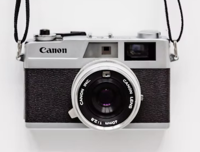

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image  # これでPillowをインポートします

# 画像を読み込み、28x28ピクセルにリサイズ、グレースケールに変換
img = Image.open("/Users/satakehiroto/camera.jpg")

img = img.resize((img.width //2, img.height //2))
# 画像を表示
img


In [ ]:
# PIL形式からNumPy形式に変換
im_np = np.asarray(img)
im_np

array([[[235, 234, 235],
        [235, 234, 235],
        [235, 234, 235],
        ...,
        [239, 237, 238],
        [239, 237, 238],
        [239, 237, 238]],

       [[236, 234, 235],
        [236, 234, 235],
        [236, 234, 235],
        ...,
        [239, 237, 238],
        [239, 237, 238],
        [239, 237, 238]],

       [[236, 234, 235],
        [236, 234, 235],
        [236, 234, 235],
        ...,
        [239, 237, 238],
        [239, 237, 238],
        [239, 237, 238]],

       ...,

       [[238, 236, 237],
        [238, 236, 237],
        [238, 236, 237],
        ...,
        [240, 238, 239],
        [240, 238, 239],
        [240, 238, 239]],

       [[238, 236, 237],
        [238, 236, 237],
        [238, 236, 237],
        ...,
        [240, 238, 239],
        [240, 238, 239],
        [240, 238, 239]],

       [[238, 236, 237],
        [238, 236, 237],
        [238, 236, 237],
        ...,
        [240, 238, 239],
        [240, 238, 239],
        [240, 238, 239]]

In [ ]:
255 - im_np

array([[[20, 21, 20],
        [20, 21, 20],
        [20, 21, 20],
        ...,
        [16, 18, 17],
        [16, 18, 17],
        [16, 18, 17]],

       [[19, 21, 20],
        [19, 21, 20],
        [19, 21, 20],
        ...,
        [16, 18, 17],
        [16, 18, 17],
        [16, 18, 17]],

       [[19, 21, 20],
        [19, 21, 20],
        [19, 21, 20],
        ...,
        [16, 18, 17],
        [16, 18, 17],
        [16, 18, 17]],

       ...,

       [[17, 19, 18],
        [17, 19, 18],
        [17, 19, 18],
        ...,
        [15, 17, 16],
        [15, 17, 16],
        [15, 17, 16]],

       [[17, 19, 18],
        [17, 19, 18],
        [17, 19, 18],
        ...,
        [15, 17, 16],
        [15, 17, 16],
        [15, 17, 16]],

       [[17, 19, 18],
        [17, 19, 18],
        [17, 19, 18],
        ...,
        [15, 17, 16],
        [15, 17, 16],
        [15, 17, 16]]], dtype=uint8)

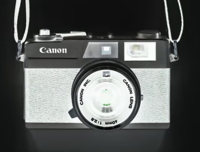

In [ ]:
# ネガティブ画像へ変換する（ブロードキャストが機能する）
negative_im_np = 255 - im_np
negative_im = Image.fromarray(negative_im_np)
negative_im

In [ ]:
import numpy as np

A = ([[0,1],[2,3],[4,5]])
B = ([[0,1,2,3],[4,5,6,7]])
C = np.dot(A,B)

print(C)
C.max()

[[ 4  5  6  7]
 [12 17 22 27]
 [20 29 38 47]]


47

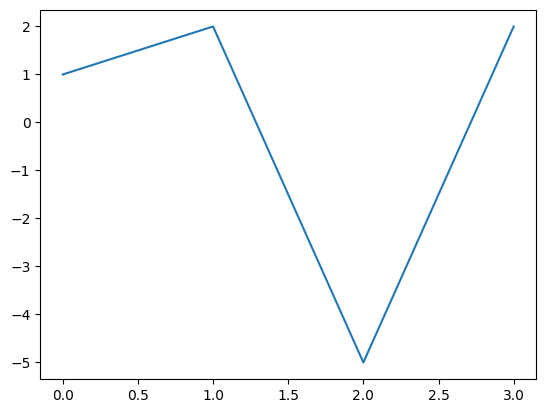

In [ ]:
import matplotlib.pyplot as plt

y = [1,2, -5,2]
plt.plot(y)

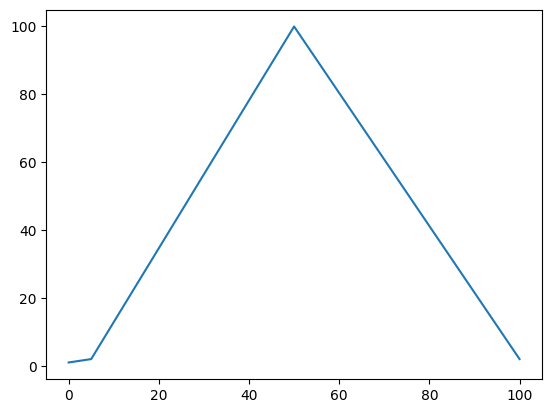

In [ ]:
import matplotlib.pyplot as plt

x = [0,5, 50,100]
y = [1,2,100,2]
plt.plot(x,y)

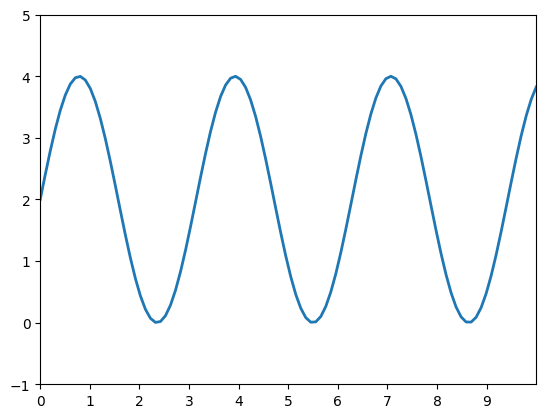

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
y = 2 + 2 * np.sin(2 * x)

fig, ax = plt.subplots()

ax.plot(x,y, linewidth = 2.0)

ax.set(xlim = (0,10),xticks = np.arange(0,10),
ylim = (-1,5), yticks=np.arange(-1,6))

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv("/Users/satakehiroto/train.csv")

df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.loc[[2]]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0


In [ ]:
df.loc[2]

POSTED_BY                           Owner
UNDER_CONSTRUCTION                      0
RERA                                    0
BHK_NO.                                 2
BHK_OR_RK                             BHK
SQUARE_FT                      933.159722
READY_TO_MOVE                           1
RESALE                                  1
ADDRESS                  Jigani,Bangalore
LONGITUDE                       12.778033
LATITUDE                        77.632191
TARGET(PRICE_IN_LACS)                43.0
Name: 2, dtype: object

In [ ]:
df.query('POSTED_BY == "Owner"')

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29441,Owner,0,0,3,BHK,1500.375094,1,1,"Sector 57 Faridabad,Faridabad",28.320000,77.289381,40.0
29445,Owner,0,0,2,BHK,1062.134891,1,1,"Tilakwadi,Belgaum",15.866670,74.500000,40.0
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0


In [ ]:
df.loc[[df['TARGET(PRICE_IN_LACS)'].idxmax()]]
df.loc[[df['TARGET(PRICE_IN_LACS)'].idxmin()]]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
14036,Owner,0,0,3,BHK,1923.076923,1,1,"Bomikhal,Bhubaneswar",20.28238,85.855363,0.25


In [ ]:
import pandas as pd

df = pd.read_csv("/Users/satakehiroto/sample_pandas_6 .csv")

df.head()

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016/3/6,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015/3/27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017/5/31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022/10/26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016/6/10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


In [ ]:
df.query('商品番号 == "Z4WOOIYV"')

,発注日,商品番号,商品名,単価,在庫,注文数
1,2015/3/27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
5,2024/4/12,Z4WOOIYV,商品サンプル Z4WOOIYV,90,35,24
24,2020/5/8,Z4WOOIYV,商品サンプル Z4WOOIYV,90,10,36
25,2022/3/21,Z4WOOIYV,商品サンプル Z4WOOIYV,90,15,54
32,2023/12/16,Z4WOOIYV,商品サンプル Z4WOOIYV,90,0,6
36,2024/8/29,Z4WOOIYV,商品サンプル Z4WOOIYV,90,35,0
54,2023/11/7,Z4WOOIYV,商品サンプル Z4WOOIYV,90,25,48
59,2020/5/3,Z4WOOIYV,商品サンプル Z4WOOIYV,90,20,42
67,2022/10/24,Z4WOOIYV,商品サンプル Z4WOOIYV,90,5,24
71,2017/10/9,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,54


In [ ]:
df.query('単価 == 600')

,発注日,商品番号,商品名,単価,在庫,注文数
3,2022/10/26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016/6/10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24
8,2021/3/10,1QJFO8QY,商品サンプル 1QJFO8QY,600,25,48
13,2022/3/21,1QJFO8QY,商品サンプル 1QJFO8QY,600,15,48
18,2018/4/25,1QJFO8QY,商品サンプル 1QJFO8QY,600,45,48
29,2018/11/12,1QJFO8QY,商品サンプル 1QJFO8QY,600,45,60
57,2022/1/29,1QJFO8QY,商品サンプル 1QJFO8QY,600,50,60
58,2024/12/23,1QJFO8QY,商品サンプル 1QJFO8QY,600,25,18
69,2018/9/4,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,48
72,2020/8/12,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,12


In [ ]:
df.query('在庫 <= 5')

,発注日,商品番号,商品名,単価,在庫,注文数
3,2022/10/26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
14,2018/11/8,48XMJXKO,商品サンプル 48XMJXKO,330,5,30
19,2016/9/15,YY4HAAZR,商品サンプル YY4HAAZR,780,5,54
32,2023/12/16,Z4WOOIYV,商品サンプル Z4WOOIYV,90,0,6
35,2018/1/3,QRMOGNUU,商品サンプル QRMOGNUU,420,0,54
41,2022/11/30,MESUDVWQ,商品サンプル MESUDVWQ,660,0,54
63,2019/9/14,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,30
67,2022/10/24,Z4WOOIYV,商品サンプル Z4WOOIYV,90,5,24
76,2018/12/28,YY4HAAZR,商品サンプル YY4HAAZR,780,0,42
77,2019/11/27,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0


In [ ]:
df.query('商品番号 == "8T7D5DQA" and 在庫 <= 5')

,発注日,商品番号,商品名,単価,在庫,注文数
131,2021/3/27,8T7D5DQA,商品サンプル 8T7D5DQA,120,0,42
199,2016/8/7,8T7D5DQA,商品サンプル 8T7D5DQA,120,0,42


In [ ]:
#def tax(x):
#    return x * 1.10

def internet(y):
    return y * 1.4

#df['単価'].apply(tax)

df['注文数'].apply(internet)

0      33.6
1      16.8
2       0.0
3      33.6
4      33.6
       ... 
195    58.8
196    42.0
197    50.4
198    67.2
199    58.8
Name: 注文数, Length: 200, dtype: float64

In [ ]:
type(df['発注日'].loc[0])

str

In [ ]:
df['発注日'] = pd.to_datetime(df['発注日'])

In [ ]:
df.agg({'発注日':['max', 'min']})

,発注日
max,2024-12-26
min,2015-01-02


In [ ]:
type(df['発注日'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
tax_series = df['単価'].apply(tax)
tax_series.name = "単価（税込）"
pd.concat([df, tax_series], axis=1)

,発注日,商品番号,商品名,単価,在庫,注文数,単価（税込）
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,858.0
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,99.0
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,858.0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,660.0
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,660.0
...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,660.0
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,99.0
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,363.0
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,462.0


In [ ]:
category_df = pd.read_csv('/Users/satakehiroto/category.csv')
category_df

,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当
3,MESUDVWQ,菓子類
4,S6RE8W6X,図書・新聞
5,X0ZE2ZMY,飲料水
6,8T7D5DQA,菓子類
7,48XMJXKO,デザート
8,QRMOGNUU,雑貨
9,2HSTCDWM,デザート


In [ ]:
df= pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df

,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー_x,カテゴリー_y
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24,弁当,弁当
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12,飲料水,飲料水
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0,弁当,弁当
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24,弁当,弁当
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24,弁当,弁当
...,...,...,...,...,...,...,...,...
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42,弁当,弁当
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30,飲料水,飲料水
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36,デザート,デザート
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48,雑貨,雑貨


In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=7e7ce613d3ea424fb833e9ed41f85d6eb83f98a23f7bf4d0014d0ffd95f75f06
  Stored in directory: /Users/satakehiroto/Library/Caches/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install japanize-matplotlib

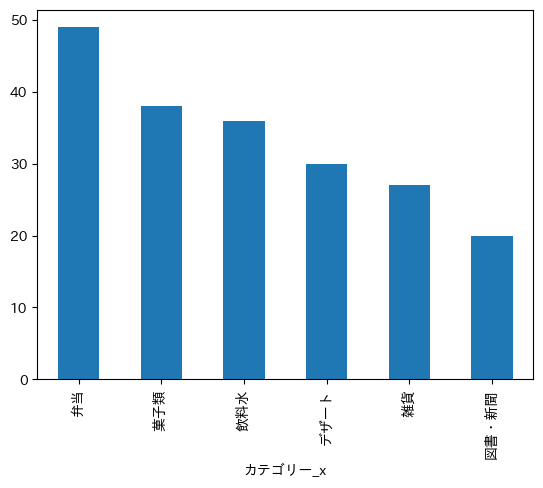

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0


In [ ]:
import matplotlib
import pandas as pd
import japanize_matplotlib

df['カテゴリー_x'].value_counts().plot(kind='bar')

plt.show()


df.groupby('商品番号')['注文数'].describe()

In [ ]:
def say_good_morning():
    print("こんにちは")
    print("さようなら")
    print("また今度")

say_good_morning()

こんにちは
さようなら
また今度


In [ ]:
df.loc[df['TARGET(PRICE_IN_LACS)'].idxmax()]

POSTED_BY                              Dealer
UNDER_CONSTRUCTION                          0
RERA                                        0
BHK_NO.                                     3
BHK_OR_RK                                 BHK
SQUARE_FT                         187500000.0
READY_TO_MOVE                               1
RESALE                                      1
ADDRESS                  R.T. Nagar,Bangalore
LONGITUDE                             13.0189
LATITUDE                              77.5963
TARGET(PRICE_IN_LACS)                 30000.0
Name: 11238, dtype: object

In [ ]:
# Productクラス①
class Product:
    def __init__(self, name, price, stock_list,category):
        self.name = name  # 商品名（映画名）
        self.price = price  # 価格
        self.stock_list = stock_list  # 在庫数のリスト
        self.category = category

    # 在庫数を更新する関数②
    def update_stock(self, sold):
        if sold <= self.stock_list:  # 売れた数が在庫数を超えない場合
            self.stock_list -= sold  # 在庫数を更新
        else:
            print("在庫が足りません。")


# ４つの映画のリスト（タイトル、値段、在庫数）③

Products1 = [
    Product("ターミネーター", 1500, 100,"Avtion"),
    Product("ターミネーター", 1300, 56,"Action"),
    Product("ターミネーター", 1400, 80,"Action"),
    Product("ターミネーター", 1000, 71,"Action"),]
Products2 =[
    Product("パイレーツ", 1200, 80,"human"),
    Product("パイレーツ", 1200, 80,"human"),
    Product("パイレーツ", 1200, 80,"human"),
    Product("パイレーツ", 1200, 80,"human")]
Products3 =[
    Product("ブレイキングバッド", 1000, 120,"SF"),
    Product("ブレイキングバッド", 1000, 120,"SF"),
    Product("ブレイキングバッド", 1000, 120,"SF"),
    Product("ブレイキングバッド", 1000, 120,"SF")]
Products4 =[
    Product("マトリックス", 1800, 50,"horror"),
    Product("マトリックス", 1800, 50,"horror"),
    Product("マトリックス", 1800, 50,"horror"),
    Product("マトリックス", 1800, 50,"horror")]

# 売上金額が一番高かった商品を更新する為の変数④
top_product_name = ""  # 一番売れた商品の名前を代入する為の変数。
top_sales = 0 #一番売れた商品の金額を代入するための変数。

top_product_category_Action = ""#カテゴリーごとに売れた商品を代入するための変数。
top_product_category_human = ""
top_product_category_SF = ""
top_product_category_horror = ""

# 各商品について売れた数をランダムに生成し、売上金額を計算⑤
for product in products:  # "product"は↑のリストの商品を意味しているただの名称。
    sold = random.randint(0,product.stock_list)  # その日の売れた数（在庫数からランダムに生成）
    total_sales = product.price * sold  # それぞれの商品の価格✖︎それぞれの売上金額

    # 売上が最大の時に更新⑥
    if total_sales > top_sales:
        top_sales = total_sales
        top_product_name = product.name

for i in 

# 結果を表示⑦
print(f"一番売上が高かったのは「{top_product_name}」で、{top_sales}円でした。")
print(f"Actionでは{}が一番売れました。")
print(f"humanでは{}が一番売れました。")
print(f"SFでは{}が一番売れました。")
print(f"horrorでは{}が一番売れました。")

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (4282297929.py, line 19)

In [ ]:
from sklearn.datasets import load_wine

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 2.3 MB/s eta 0:00:0000:0100:01


In [ ]:
#サンプルデータを読み込ませる

from sklearn.datasets import load_wine

In [ ]:
#サンプルデータをdatasetという変数に代入する。そして中身を表示させる。
dataset = load_wine()
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00, 1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00, 1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00, 1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00, 8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00, 8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00, 5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
#データセットのデータの部分のみを表示させる。
dataset.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00, 1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00, 1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00, 1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00, 8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00, 8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00, 5.600e+02]])

In [ ]:
#データセットのfeature_namesを表示させる。
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
#パンダすを使い列と行で表にする。最初の五行だけ表示させる。
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
#データセットの中にあるターゲット（種類）を表示させる。
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#データセットの中のターゲットの名前を変更「カテゴリー」に変更&追加する。最初の五行のみ表示する。
df['category'] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#データフレームの行と列の数を表示。
df.shape

(178, 14)

In [ ]:
#それぞれ代入していく。
X = dataset.data
y = dataset.target

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
#学習とテストデータでの割合を７０パー、答えの割合を３０パーで分ける。

train_test_split(X, y, test_size=0.3, random_state=5)
# 以下のようにrandom_stateを指定しない場合、実行毎に結果が異なります。
# train_test_split(X, y, test_size=0.3)

[array([[1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00, 7.500e+02],
        [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00, 4.380e+02],
        [1.285e+01, 3.270e+00, 2.580e+00, ..., 8.700e-01, 2.110e+00, 5.700e+02],
        ...,
        [1.225e+01, 3.880e+00, 2.200e+00, ..., 6.500e-01, 2.000e+00, 8.550e+02],
        [1.277e+01, 3.430e+00, 1.980e+00, ..., 7.000e-01, 2.120e+00, 3.720e+02],
        [1.229e+01, 3.170e+00, 2.210e+00, ..., 1.420e+00, 2.830e+00, 4.060e+02]]),
 array([[1.387000e+01, 1.900000e+00, 2.800000e+00, 1.940000e+01, 1.070000e+02, 2.950000e+00, 2.970000e+00, 3.700000e-01, 1.760000e+00, 4.500000e+00, 1.250000e+00, 3.400000e+00, 9.150000e+02],
        [1.311000e+01, 1.010000e+00, 1.700000e+00, 1.500000e+01, 7.800000e+01, 2.980000e+00, 3.180000e+00, 2.600000e-01, 2.280000e+00, 5.300000e+00, 1.120000e+00, 3.180000e+00, 5.020000e+02],
        [1.437000e+01, 1.950000e+00, 2.500000e+00, 1.680000e+01, 1.130000e+02, 3.850000e+00, 3.490000e+00, 2.400000

In [ ]:
#予測モデルをインスタンス化する。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(178, 13) (124, 13) (54, 13) (178,) (124,) (54,)


In [ ]:
#予測モデルの方法を決め、インポートする。
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=3)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=3)

In [ ]:
#読んで字の如く、X_testに対してmodel(DecisionTreeClassfier)を使用して予測する。その結果をy_predに代入していく。

y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0])

In [ ]:
#本当いの答え（教師あり）
y_test

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#本当の答えと、予測した答えを比較して比較する。
accuracy_score(y_test,y_pred)

0.9259259259259259

In [1026]:

model.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 54]

In [ ]:
#テストデータではない他のワインのデータを使用して、ワインの種類を当てていく。

import numpy as np

X_real = np.array([
    [13, 1.6, 1.4, 16, 118, 2.6, 2.9, 0.21, 8.6, 5.8, 0.92, 3.2, 1100],
    [12, 2.8, 2.2, 18, 100, 2.5, 2.3, 0.25, 2.0, 2.2, 1.15, 3.3, 1000],
    [14, 4.1, 2.7, 24, 101, 1.6, 0.7, 0.53, 1.4, 9.4, 0.61, 1.6, 560]])

In [ ]:
#学習済みのモデル君(超優秀)を使用して上の新しいデータを使い、種類を予測していく（プレディクトを使用）。関数で考えると、modelっていうのがクラス（設計図）、この設計図をもとに他のワインの成分を使用し、新しく予測していく。←これが最終的にやりたいこと。
model.predict(X_real)

array([0, 1, 2])

In [1031]:
purchased = True

def is_purchased():
    if(purchased):
        return True
    else:
        return False
    
if(is_purchased()):
    print("商品は購入済みです。")

商品は購入済みです。


In [1047]:
from sklearn.datasets import load_wine

In [1048]:
dataset = load_wine()
dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00, 1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00, 1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00, 1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00, 8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00, 8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00, 5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [1049]:
dataset.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00, 1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00, 1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00, 1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00, 8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00, 8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00, 5.600e+02]])

In [1050]:
import pandas as pd
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [1051]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1052]:
df['category'] = dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [1053]:
df.shape

(178, 14)

In [1054]:
X = dataset.data
y = dataset.target

In [1055]:
from sklearn.model_selection import train_test_split

In [1056]:
train_test_split(X, y, test_size=0.3, random_state=5)
# 以下のようにrandom_stateを指定しない場合、実行毎に結果が異なります。
# train_test_split(X, y, test_size=0.3)

[array([[1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00, 7.500e+02],
        [1.234e+01, 2.450e+00, 2.460e+00, ..., 8.000e-01, 3.380e+00, 4.380e+02],
        [1.285e+01, 3.270e+00, 2.580e+00, ..., 8.700e-01, 2.110e+00, 5.700e+02],
        ...,
        [1.225e+01, 3.880e+00, 2.200e+00, ..., 6.500e-01, 2.000e+00, 8.550e+02],
        [1.277e+01, 3.430e+00, 1.980e+00, ..., 7.000e-01, 2.120e+00, 3.720e+02],
        [1.229e+01, 3.170e+00, 2.210e+00, ..., 1.420e+00, 2.830e+00, 4.060e+02]]),
 array([[1.387000e+01, 1.900000e+00, 2.800000e+00, 1.940000e+01, 1.070000e+02, 2.950000e+00, 2.970000e+00, 3.700000e-01, 1.760000e+00, 4.500000e+00, 1.250000e+00, 3.400000e+00, 9.150000e+02],
        [1.311000e+01, 1.010000e+00, 1.700000e+00, 1.500000e+01, 7.800000e+01, 2.980000e+00, 3.180000e+00, 2.600000e-01, 2.280000e+00, 5.300000e+00, 1.120000e+00, 3.180000e+00, 5.020000e+02],
        [1.437000e+01, 1.950000e+00, 2.500000e+00, 1.680000e+01, 1.130000e+02, 3.850000e+00, 3.490000e+00, 2.400000

In [1057]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [1058]:
print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(178, 13) (124, 13) (54, 13) (178,) (124,) (54,)


In [1069]:
from sklearn.ensemble import GradientBoostingClassifier

In [1070]:
model = GradientBoostingClassifier(random_state=3)

In [1071]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=3)

In [1072]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0])

In [1073]:
y_test

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0])

In [1074]:
from sklearn.metrics import accuracy_score

In [1075]:
accuracy_score(y_test,y_pred)

0.9259259259259259

In [1076]:
import pandas as pd
import seaborn as sns

In [1077]:
from sklearn.datasets import fetch_california_housing

In [1078]:
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,   37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,   37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,   37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,   39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,   39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,   39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n------------------------

In [1079]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [1080]:
df["Price"] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [1081]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [1084]:
feature_names_JPN = ['所得', '築年数', '部屋数', '寝室数', '地域人口', '世帯人数', '緯度', '経度', '住宅価格']
df.columns = feature_names_JPN
df

,所得,築年数,部屋数,寝室数,地域人口,世帯人数,緯度,経度,住宅価格
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [1083]:
df.shape

(20640, 9)

In [1085]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   所得      20640 non-null  float64
 1   築年数     20640 non-null  float64
 2   部屋数     20640 non-null  float64
 3   寝室数     20640 non-null  float64
 4   地域人口    20640 non-null  float64
 5   世帯人数    20640 non-null  float64
 6   緯度      20640 non-null  float64
 7   経度      20640 non-null  float64
 8   住宅価格    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [1086]:
df.describe()

,所得,築年数,部屋数,寝室数,地域人口,世帯人数,緯度,経度,住宅価格
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [1089]:
!pip install japanize-matplotlib

In [1090]:
import japanize_matplotlib

array([[<Axes: title={'center': '所得'}>, <Axes: title={'center': '築年数'}>, <Axes: title={'center': '部屋数'}>],
       [<Axes: title={'center': '寝室数'}>, <Axes: title={'center': '地域人口'}>, <Axes: title={'center': '世帯人数'}>],
       [<Axes: title={'center': '緯度'}>, <Axes: title={'center': '経度'}>, <Axes: title={'center': '住宅価格'}>]], dtype=object)

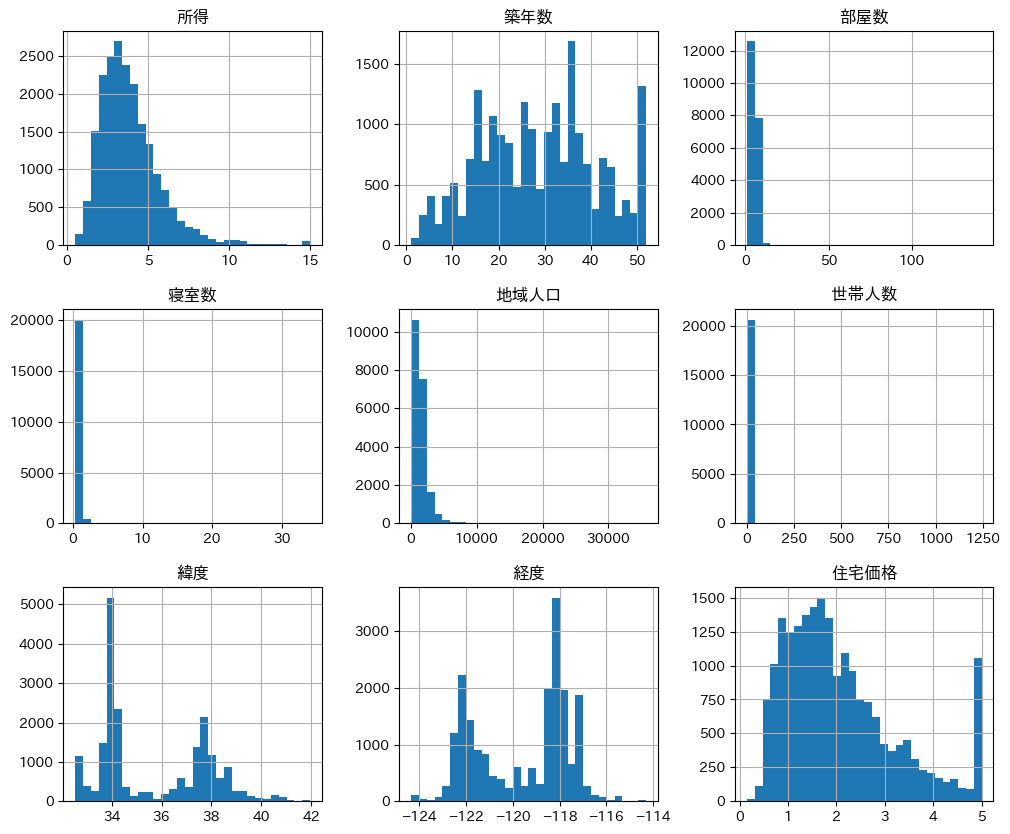

In [1091]:
df.hist(bins=30, figsize=(12, 10))

<Axes: xlabel='地域人口'>

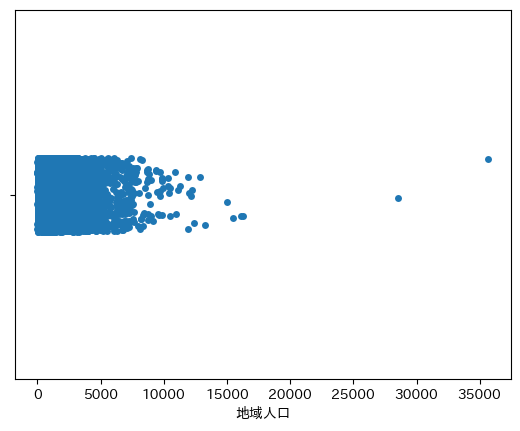

In [1092]:
sns.stripplot(x='地域人口', data=df)

In [1094]:
df.query('築年数 == 52').shape

(1273, 9)

In [1095]:
df = df[df['築年数'] != 52]

In [1096]:
df.query('住宅価格 == 5.000010').shape

(795, 9)

In [1099]:
df = df[df['住宅価格'] != 5.000010]

<Axes: xlabel='部屋数'>

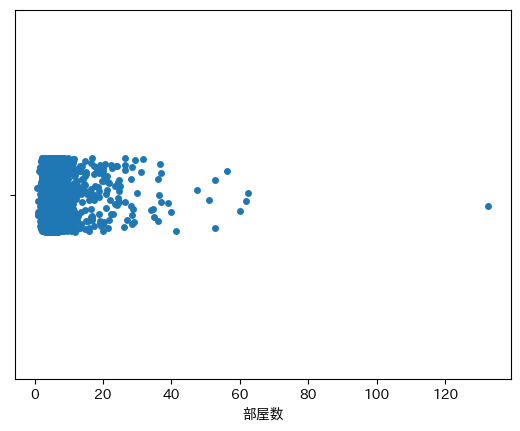

In [1100]:
sns.stripplot(x='部屋数', data=df)

<Axes: xlabel='世帯人数'>

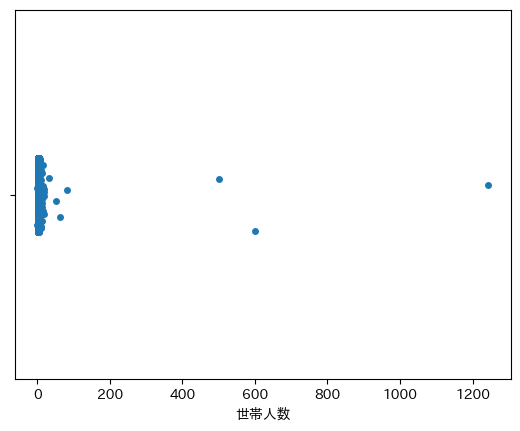

In [1101]:
sns.stripplot(x='世帯人数', data=df)

In [1102]:
df['世帯数'] = df['地域人口']/df['世帯人数']
df.head()

,所得,築年数,部屋数,寝室数,地域人口,世帯人数,緯度,経度,住宅価格,世帯数
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,595.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400,264.0
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587,419.0


In [1103]:
df['全部屋数'] = df['部屋数']*df['世帯数']
df['全寝室数'] = df['寝室数']*df['世帯数']
df.head()

,所得,築年数,部屋数,寝室数,地域人口,世帯人数,緯度,経度,住宅価格,世帯数,全部屋数,全寝室数
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,880.0,129.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,7099.0,1106.0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,595.0,2555.0,665.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400,264.0,1120.0,283.0
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587,419.0,2239.0,455.0


In [1105]:
df['部屋数/人'] = df['全部屋数']/df['地域人口']
df['寝室数/人'] = df['全寝室数']/df['地域人口']
df.head()

,所得,築年数,部屋数,寝室数,地域人口,世帯人数,緯度,経度,住宅価格,世帯数,全部屋数,全寝室数,部屋数/人,寝室数/人
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,880.0,129.0,2.732919,0.400621
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,7099.0,1106.0,2.956685,0.460641
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,595.0,2555.0,665.0,2.118574,0.551410
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400,264.0,1120.0,283.0,1.606887,0.406026
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587,419.0,2239.0,455.0,2.261616,0.459596


<Axes: xlabel='部屋数/人', ylabel='寝室数/人'>

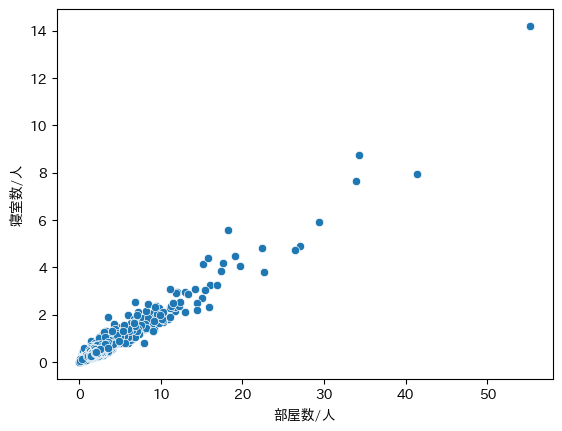

In [1106]:
sns.scatterplot(x='部屋数/人', y='寝室数/人', data=df)

In [1107]:
df = df.drop(columns = ['部屋数', '寝室数', '世帯人数', '世帯数', '全部屋数', '全寝室数'])

In [1108]:
df.shape

(18572, 8)

array([[<Axes: title={'center': '所得'}>, <Axes: title={'center': '築年数'}>, <Axes: title={'center': '地域人口'}>],
       [<Axes: title={'center': '緯度'}>, <Axes: title={'center': '経度'}>, <Axes: title={'center': '住宅価格'}>],
       [<Axes: title={'center': '部屋数/人'}>, <Axes: title={'center': '寝室数/人'}>, <Axes: >]], dtype=object)

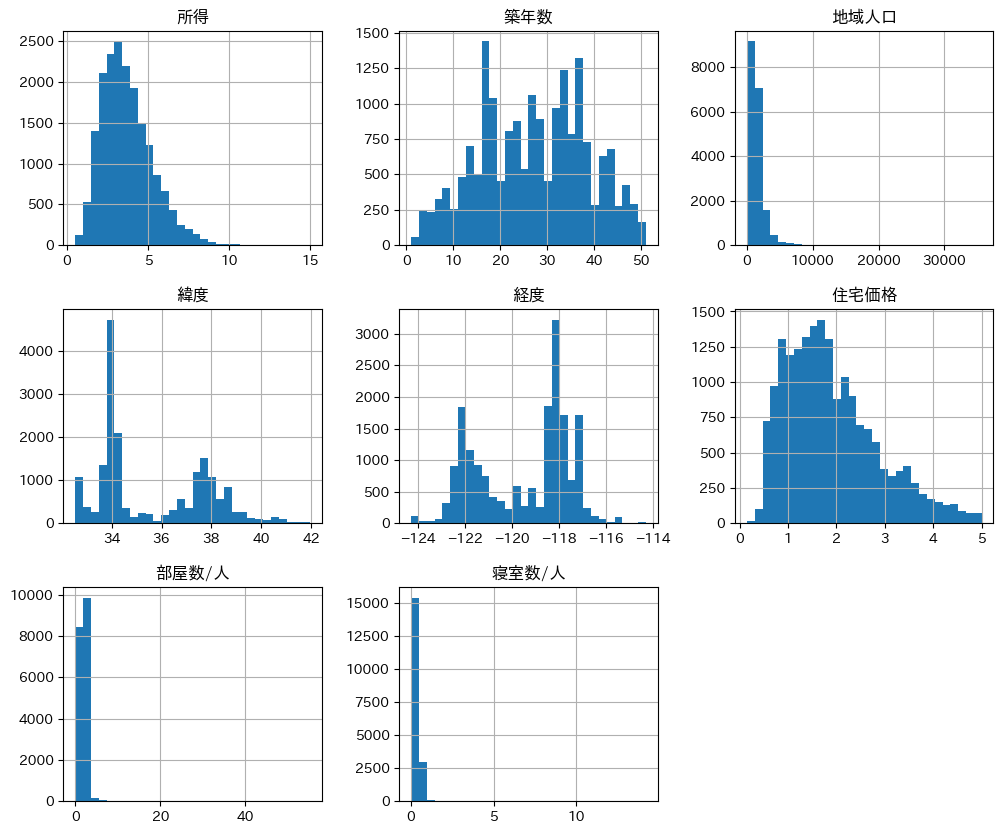

In [1109]:
df.hist(figsize=(12,10), bins=30)

In [1112]:
df.to_csv('/Users/satakehiroto/california_housing_cleansing.csv')

In [1113]:
import numpy as np
import pandas as pd
import seaborn as sns

In [1115]:
!pip install japanize-matplotlib

In [1116]:
import japanize_matplotlib

In [1117]:
df = pd.read_csv('/Users/satakehiroto/california_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [1118]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [1119]:
df.shape

(18572, 8)

In [1120]:
X = df.drop(columns=['住宅価格']).to_numpy()
y = df['住宅価格'].to_numpy()

In [1121]:
from sklearn.model_selection import train_test_split

In [1122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1123]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13000, 7) (5572, 7) (13000,) (5572,)


In [1124]:
from sklearn.linear_model import LinearRegression

In [1125]:
model = LinearRegression()

In [1126]:
model.fit(X_train, y_train)

LinearRegression()

In [1127]:
model.score(X_train, y_train)

0.5967954005117012

In [1128]:
model.score(X_test, y_test)

0.5752388860477959

In [1129]:
X_new = np.array([[8, 41, 500, 37, -120, 1, 0.2],
                  [2, 10, 2000, 38, -122, 1.5, 0.5],
                  [1, 25, 1000, 38, -121, 2, 1]])

In [1130]:
model.predict(X_new)

array([3.2387497 , 1.42228534, 1.43428255])

In [1131]:
print(model.coef_)
print(model.intercept_)

[ 4.08110906e-01  6.92312594e-03  1.70628946e-05 -4.04061927e-01 -4.10380169e-01 -2.08486703e-01  1.69589529e+00]
-34.7445385195233


<Axes: >

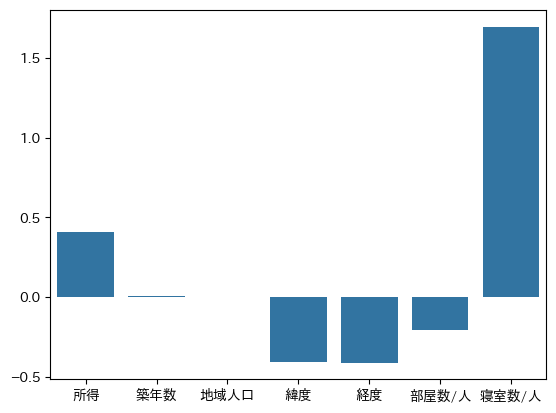

In [1132]:
sns.barplot(x = ['所得', '築年数', '地域人口', '緯度', '経度', '部屋数/人', '寝室数/人'], y=model.coef_)

In [1133]:
df.describe()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
count,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000,18572.000000
mean,3.693262,26.983847,1470.392957,35.593231,-119.484929,1.896076,1.936448,0.398033
std,1.570045,11.431815,1162.944307,2.147712,1.980865,0.957902,1.122496,0.242479
min,0.499900,1.000000,3.000000,32.540000,-124.300000,0.149990,0.002547,0.000670
25%,2.537275,17.000000,811.000000,33.920000,-121.550000,1.154000,1.490197,0.311688
50%,3.468350,27.000000,1203.000000,34.240000,-118.450000,1.712000,1.905719,0.366856
75%,4.616100,36.000000,1781.000000,37.670000,-117.970000,2.432250,2.239138,0.435936
max,15.000100,51.000000,35682.000000,41.950000,-114.310000,5.000000,55.222222,14.194444
